Checking if GPU is present


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

You have one


Checking GPU devices

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11793972567461833500, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4828083725422342157
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

ANN - Classification


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

X=pd.concat([X,geography,gender],axis=1)

X=X.drop(['Geography','Gender'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
network1 = Sequential() #definig the network

network1.add(Dense(units=6, activation='LeakyReLU', kernel_initializer='HeUniform', input_dim = 11)) #hidden layer 1
network1.add(Dense(units=6, activation='relu', kernel_initializer='HeNormal')) #hidden laayer 2
network1.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')) #output layer

network1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #compiling the network

In [ ]:
model = network1.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split = 0.3) #fitting the model

Epoch 1/100
560/560 [==============================] - 15s 3ms/step - loss: 0.6681 - accuracy: 0.5565 - val_loss: 0.4778 - val_accuracy: 0.8025
Epoch 2/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4524 - accuracy: 0.8103 - val_loss: 0.4394 - val_accuracy: 0.8075
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.8198 - val_loss: 0.4314 - val_accuracy: 0.8067
Epoch 4/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4096 - accuracy: 0.8318 - val_loss: 0.4258 - val_accuracy: 0.8092
Epoch 5/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4110 - accuracy: 0.8239 - val_loss: 0.4204 - val_accuracy: 0.8146
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8217 - val_loss: 0.4101 - val_accuracy: 0.8217
Epoch 7/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3856 - accuracy: 0.8352 - val_loss: 0.3970 - val_accuracy: 0.832

In [ ]:
ypred = network1.predict(X_test) #predicting the model
ypred = (ypred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix #evaluation
print(confusion_matrix(y_test, ypred))

[[1486  109]
 [ 187  218]]


In [ ]:
print(model.history.keys()) # list all data in history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


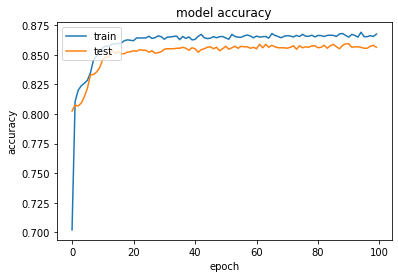

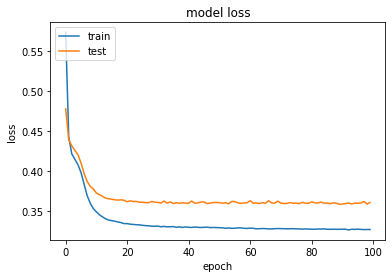

In [ ]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ANN - with hyper-parameter tuning

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 102kB 11.3MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=784a9e2e5c23a88e93928dadfe1089f565a1a365ba90319add61e84d7d0c7656
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [ ]:
Df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Real_Combine.csv")

X1=Df.iloc[:,:-1] 
y1=Df.iloc[:,-1] 

In [ ]:
def build_model(hp):

    network2 = keras.Sequential() #defining network

    for i in range(hp.Int('num_layers', 2, 10)): 
        network2.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=2 ),activation='relu')) #hidden layers
    
    network2.add(layers.Dense(1, activation='linear')) #output layer

    network2.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mean_absolute_error',metrics=['mean_absolute_error'])

    return network2

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=2,
    executions_per_trial=3,
    directory='ANN2',
    project_name='AirQualityIndex')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 2, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [ ]:
tuner.search(Xtrain, ytrain, epochs=5, validation_data=(Xtest, ytest), over_write = False)

INFO:tensorflow:Oracle triggered exit
